In [ ]:
import os
import re
import pandas as pd
import numpy as np
import nltk

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from nltk.corpus import stopwords
from textblob import Word


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_bodies = os.path.join(os.getcwd(), '/content/drive/MyDrive/FAKE_NEWS_DETECTION/DATASET/train_bodies.csv')
train_stances = os.path.join(os.getcwd(), '/content/drive/MyDrive/FAKE_NEWS_DETECTION/DATASET/train_stances.csv')

tb=pd.read_csv(train_bodies)
ts=pd.read_csv(train_stances)


In [ ]:
tb

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...
...,...,...
1678,2528,Intelligence agencies hunting for identity of ...
1679,2529,"While Daleks ""know no fear"" and ""must not fear..."
1680,2530,More than 200 schoolgirls were kidnapped in Ap...
1681,2531,A Guantanamo Bay prisoner released last year a...


In [ ]:
ts

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree
...,...,...,...
49967,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,1681,unrelated
49968,Brian Williams slams social media for speculat...,2419,unrelated
49969,Mexico Says Missing Students Not Found In Firs...,1156,agree
49970,US Lawmaker: Ten ISIS Fighters Have Been Appre...,1012,discuss


In [ ]:
df = pd.merge(tb, ts, how='inner', on = 'Body ID')
df

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,unrelated
...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",agree
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",agree
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",agree
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,agree


In [ ]:
df.describe()

,Body ID
count,49972.000000
mean,1366.254863
std,730.086644
min,0.000000
25%,737.750000
50%,1419.000000
75%,2002.000000
max,2532.000000


In [ ]:
ts["Headline"][89]

'Jihadi John identity revealed as Mohammed Emwazi: live'

In [ ]:
tb["articleBody"][189]


'Young boy is seen holding guns in images circulated on social media\n\nIsis supporters are circulating images of a child they say has become the youngest foreign fighter to be killed in battle for the jihadist group, according a counter-extremism think tank.\n\nThe images, which cannot be independently verified, show a young boy believed to be about 10-years-old holding guns, posing with a balaclava stretched across his face and standing alongside a man thought to be his father who is reportedly a militant.\n\nThose sharing the pictures are paying tribute to the child on Twitter as the youngest martyr from the Arabian Peninsula to have been killed in Syria as Isis tries to establish a caliphate across swathes of the region, according to Charlie Cooper, a researcher at the Quilliam Foundation.\n\nMr Cooper said the images have been circulated on social media with hashtags translated as ‘martyrdom of the cub of Baghdadi and his father\'. It is claimed that reports of his death first eme

In [ ]:
punctuation =  re.compile(r"[?;,\'-]")
def clean(article):
  article = re.sub(punctuation, ' ', article)
  article = article.replace("\n",'')
  return article

In [ ]:
tb['articleBody'] = tb['articleBody'].map(lambda x: clean(x))

ts['clean_headline_length'] = ts['Headline'].map(lambda x : len(x.split()))
tb['clean_article_length'] = tb['articleBody'].map(lambda x : len(x.split()))
df["articleBody"] = df['articleBody'].map(lambda x : clean(x))

In [ ]:
fig = go.Figure()
fig = make_subplots(rows=2, cols=1)
trace0=go.Histogram(x=ts["clean_headline_length"],name="Headlines")
trace1=go.Histogram(x=tb["clean_article_length"],name="Articles")

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.show()

In [ ]:
stat = {
        "Article":tb[['clean_article_length']].agg(['max','mean','min']).round().values.flatten(),
        "Healine":ts[['clean_headline_length']].agg(['max','mean','min']).round().values.flatten()
        }
  
stats = pd.DataFrame(stat,index=['max','mean','min'])

In [ ]:
fig = go.Figure(
    data=[
          go.Bar(name="Min",x=stats.columns, y=stats.loc['min'],text=stats.loc['min'],textposition="auto", marker_color="rgb(245, 203, 66)"),
          go.Bar(name="Mean",x=stats.columns, y=stats.loc['mean'],text=stats.loc['mean'],textposition="auto", marker_color="rgb(66, 96, 245)"),
          go.Bar(name="Max",x=stats.columns, y=stats.loc['max'],text=stats.loc['max'],textposition="auto",marker_color="rgb(245, 66, 66)")
])

fig.update_layout(title="Word count in the dataset",
                  barmode='group',
                  width=400,
                  height=400,
                  font=dict(size=8), plot_bgcolor="white")

fig.show()

In [ ]:
d = dict()
l1=[ts["Headline"],tb["articleBody"]]
l2=list()
for x in l1:
  l2.append(x.str.cat(sep=". ").lower())
  
df1=pd.DataFrame([l2])
df1

,0,1
0,police find mass graves with at least '15 bodi...,a small meteorite crashed into a wooded area i...


In [ ]:
nltk.download('stopwords')
stop = stopwords.words('english')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
for a in range(97, 123):
   stop.append(chr(a)) 


In [ ]:
def remove(article):
  pat = re.compile(r'[^a-zA-Z ]+')
  answer = re.sub(pat, '', article)
  return answer
  
for y in df1.columns:
  df1[y] = df1[y].map(lambda x : remove(x))
  df1[y]=df1[y].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  df1[y]=df1[y].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
  common_in_all_cols=pd.Series(" ".join(df1[y]).split()).value_counts()[:50]
  df1[y]=df1[y].apply(lambda x : " ".join(x for x in x.split() if x not in list(common_in_all_cols.index)))


In [ ]:
df1

,0,1
0,police find mass graf least body near mexico t...,small meteorite crashed wooded area nicaragua ...


In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

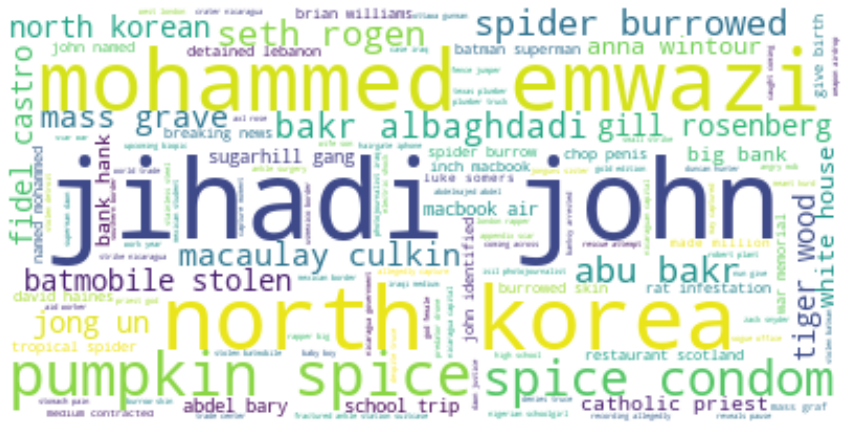

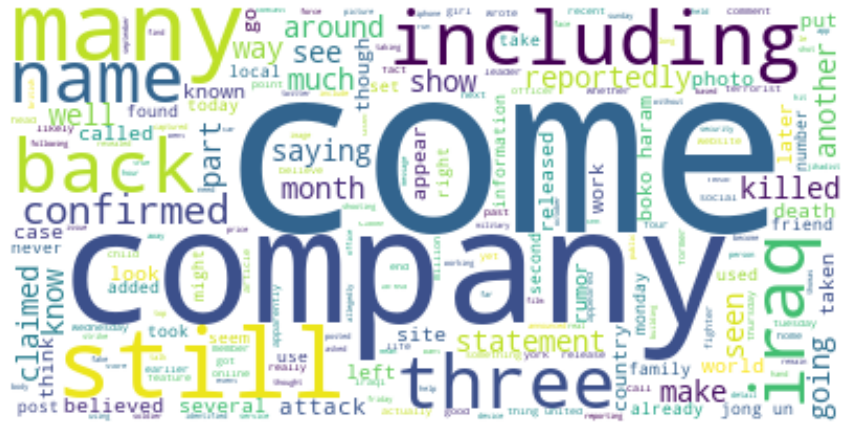

In [ ]:
for x in df1:
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(df1[x][0])
  plt.figure(figsize=(15,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  print("\n\n\n\n\n\n\n")

In [ ]:
df[["Stance","Body ID"]].groupby(["Stance"]).agg('count')

,Body ID
Stance,
agree,3678
disagree,840
discuss,8909
unrelated,36545


In [ ]:
df["Stance"]=df['Stance'].replace(to_replace="agree",value=0)
df["Stance"]=df['Stance'].replace(to_replace="disagree",value=1)
# df["Stance"]=df['Stance'].replace(to_replace="discuss",value=2)
# df["Stance"]=df['Stance'].replace(to_replace="unrelated",value=0)
df=df[~(df["Stance"]=="discuss")]
df=df[~(df["Stance"]=="unrelated")]


In [ ]:
df2=pd.DataFrame()
df2=df[df["Stance"]==1]

In [ ]:
df2.drop("Body ID",axis=1,inplace=True)
df.drop("Body ID",axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2=df2.append(df2).reset_index(drop=True)
df2=df2.sample(frac=1)
df2=df2.append(df2).reset_index(drop=True)
df2=df2.sample(frac=1)
df2=df2.reset_index()
df2.drop("index",axis=1,inplace=True)
df2

,articleBody,Headline,Stance
965,Prepare to meet ... mite man.Doctors removed a...,Bunbury local discovered a spider had burrowed...,1
684,Vladimir Putin spoke at the dedication of a ne...,A Bunch Of Folks Are Passing Around This Hoax ...,1
1578,Wanted: Islamic State group chief Abu Bakr al ...,Woman detained in Lebanon is not al-Baghdadi's...,1
713,LONDON — The North Korean embassy in London ha...,North Korean dictator Kim Jong-Un to open rest...,1
158,Claim: A vacationing man discovered that incre...,"Tropical spider burrows under man's skin, live...",1
...,...,...,...
1516,MAIDUGURI Nigeria — The leader of Nigeria’s I...,Boko Haram ceasefire ignored as violence flare...,1
14,WORLDWIDE NASA has confirmed that the Earth ...,’6 Days Darkness in December 2014′ 100% Fake; ...,1
1624,It was a heartwarming story for legions of pet...,Animal lovers abuzz over pope’s comments that ...,1
1210,Boko Haram has denied claims by Nigeria s gove...,Boko Haram ceasefire ignored as violence flare...,1


In [ ]:
df=df.append(df2).reset_index(drop=True)
df=df.sample(frac=1)
df=df.reset_index()
df.drop("index",axis=1,inplace=True)
df

,index,articleBody,Headline,Stance
0,5694,You may have seen the amazing story today abou...,This Kid Made $72 Million During Lunch,1
1,4525,Get Patheos Atheist NewslettersFollow PatheosA...,Priest who died for 48 minutes says he met God...,1
2,4673,You can purchase a lot of things for $800 mill...,Rumor Robert Plant Ripped Up $800 Million Cont...,1
3,1488,Erdogan argued that the Turkish weapons drop h...,Turkish president says American weapons drop f...,0
4,7695,You may have seen the amazing story today abou...,High school student scores $72M playing the st...,1
...,...,...,...,...
7873,2406,A holidaymaker was left horrified after discov...,Spider Burrows Into Australian Man's Appendix ...,0
7874,161,One of the best things about the Internet is t...,’6 Days Darkness in December 2014′ 100% Fake; ...,0
7875,6355,"""We needed the best actor on the board in a ce...",Who Should Play Steve Jobs Now That Christian ...,1
7876,2926,HUNTINGTON BEACH (CBSLA.com) — The viral vid...,Homeless man receives $100... then shocks ever...,1


In [ ]:
df.to_csv('Train_dataset.csv')

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.3 MB/s 
     |████████████████████████████████| 4.9 MB 25.4 MB/s 
     |████████████████████████████████| 1.3 MB 58.1 MB/s 
     |████████████████████████████████| 163 kB 66.7 MB/s 
     |████████████████████████████████| 6.6 MB 55.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=e812ef099f0fb782c95e2880e9a739002ea094c9b63b6847bda0146a04524033
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
# import skipthoughts
# import sent2vec
from nltk import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = Vectorizer(pretrained_weights='distilbert-base-uncased')
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
# from skip_thoughts import configuration
# from skip_thoughts import encoder_manager
# from sklearn.feature_extraction.text import TfidfVectorizer



# VOCAB_FILE = ".\\skip_thoughts_bi_2017_02_16\\vocab.txt"
# EMBEDDING_MATRIX_FILE = ".\\skip_thoughts_bi_2017_02_16\\embeddings.npy"
# CHECKPOINT_PATH = ".\\skip_thoughts_bi_2017_02_16\\model.ckpt-500008"

# model=skipthoughts.load_model()
# encoder=skipthoughts.encoder(model)
# encoder = encoder_manager.EncoderManager()
# encoder.load_model(configuration.model_config(bidirectional_encoder=True),vocabulary_file=VOCAB_FILE,embedding_matrix_file=EMBEDDING_MATRIX_FILE,checkpoint_path=CHECKPOINT_PATH)

def neural_features(dataset_loc):

    english_dataset = pd.read_csv(dataset_loc)
    headline = english_dataset['Headline']
    body = english_dataset['articleBody']
    labels = [int(x) for x in english_dataset['Stance']]
    

    labels_done = []
    flag = True
    body_encodings = np.zeros((len(body),768))
    j = 0
    for i in range(len(body)):
        # print(i)
        flag=True
        try:
            # vectorizer.run(body[i,i+1], remove_stop_words=['not'], add_stop_words=[])
            current_body_encoding =sbert_model.encode(body[i])
            #  vectorizer.vectors
            
        except:
            flag=False
        
        if(flag==True):
            # print(current_body_encoding)
            labels_done.append(i)
            print("Labels Done "+str(len(labels_done)))
            body_encodings[len(labels_done)-1] = current_body_encoding

    body_encodings = body_encodings[0:len(labels_done)]

    headline_encodings = np.zeros((len(labels_done),768))
    for count,i in enumerate(labels_done):
        # vectorizer.run(headline[i,i+1], remove_stop_words=['not'], add_stop_words=[])
        current_headline_encode = sbert_model.encode(headline[i])
        #vectorizer.vectors

        headline_encodings[count] = current_headline_encode

    feat1 = np.zeros((len(labels_done),768))
    feat2 = np.zeros((len(labels_done),768))
    i = 0
    for headline_vector,body_vector in zip(headline_encodings,body_encodings):
        # print(i)
        feat1[i] = np.dot(headline_vector,body_vector)
        feat2[i] = np.absolute(headline_vector-body_vector)
        i+=1

    final_neural_features = np.concatenate((feat1,feat2),axis = 1)

    return final_neural_features,labels_done






In [ ]:
def statistical_features(dataset_loc,labels_done_):

    english_dataset = pd.read_csv(dataset_loc)
    headline = english_dataset['Headline']
    body = english_dataset['articleBody']
    labels = [int(x) for x in english_dataset['Stance']]

    headline_ = []
    body_ = []
    for i in labels_done_:
        headline_.append(headline[i])
        body_.append(body[i])

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(headline_)

    vectorizer = TfidfVectorizer(max_features = (10000-X.shape[1]))
    Y = vectorizer.fit_transform(body_)

    final_statistical_features = np.concatenate((np.array(X.toarray()),np.array(Y.toarray())),axis = 1)

    return final_statistical_features

In [ ]:
def external_features(dataset_loc,labels_done_):
    
    english_dataset = pd.read_csv(dataset_loc)
    headline = english_dataset['Headline']
    body = english_dataset['articleBody']
    labels = [int(x) for x in english_dataset['Stance']]

    headline_ = []
    body_ = []
    for i in labels_done_:
        headline_.append(headline[i])
        body_.append(body[i])

    eng_ext = []
    i = 0
    for sent1,sent2 in zip(headline_,body_):
        print(i)
        i+=1
        vec = []
        #character ngrams
        for n in range(2,17):
            n_grams_1 = ngrams(sent1.lower(), n)
            n_grams_2 = ngrams(sent2.lower(),n)
            vec.append(len(list(set(n_grams_1).intersection(n_grams_2))))

        #word ngrams
        for n in range(2,7):
            n_grams_1 = ngrams(sent1.lower().split(), n)
            n_grams_2 = ngrams(sent2.lower().split(),n)
            vec.append(len(list(set(n_grams_1).intersection(n_grams_2))))

        #Sentence polarity
        flag=False
        text1 = Text(sent1)
        text2 = Text(sent2)
        pol1 = 0
        pol2 = 0
        for word in text1.tokens:
            try:
                pol1+=word.polarity
            except:
                flag=True
                vec.append(0)
                break
            if (flag==True):
                eng_ext.append(vec)
                continue
            flag=False
        for word in text2.tokens:
            try:
                pol2+=word.polarity
            except:
                flag=True
                vec.append(0)
                break
        if (flag==True):
            eng_ext.append(vec)
            continue
  
        pol1 = pol1/(len(sent1.split())*1.0)
        pol2 = pol2/(len(sent2.split())*1.0)
        vec.append(pol1-pol2)

        eng_ext.append(vec)

    eng_ext = np.array(eng_ext)

    return eng_ext


In [ ]:
from nltk.text import Text

In [ ]:
train_dataset_loc='Train_dataset.csv'


In [ ]:
neural_features_train,labels_done_train = neural_features(train_dataset_loc)
np.save(arr=neural_features_train,file='english_train_neural.npy')
# np.save(arr=neural_features_test,file='./Data/english_test_neural.npy')
np.save(arr=labels_done_train,file='labels_done_train.npy')
# np.save(arr=labels_done_test,file = './Data/labels_done_test.npy')


Streaming output truncated to the last 5000 lines.
Labels Done 2879
Labels Done 2880
Labels Done 2881
Labels Done 2882
Labels Done 2883
Labels Done 2884
Labels Done 2885
Labels Done 2886
Labels Done 2887
Labels Done 2888
Labels Done 2889
Labels Done 2890
Labels Done 2891
Labels Done 2892
Labels Done 2893
Labels Done 2894
Labels Done 2895
Labels Done 2896
Labels Done 2897
Labels Done 2898
Labels Done 2899
Labels Done 2900
Labels Done 2901
Labels Done 2902
Labels Done 2903
Labels Done 2904
Labels Done 2905
Labels Done 2906
Labels Done 2907
Labels Done 2908
Labels Done 2909
Labels Done 2910
Labels Done 2911
Labels Done 2912
Labels Done 2913
Labels Done 2914
Labels Done 2915
Labels Done 2916
Labels Done 2917
Labels Done 2918
Labels Done 2919
Labels Done 2920
Labels Done 2921
Labels Done 2922
Labels Done 2923
Labels Done 2924
Labels Done 2925
Labels Done 2926
Labels Done 2927
Labels Done 2928
Labels Done 2929
Labels Done 2930
Labels Done 2931
Labels Done 2932
Labels Done 2933
Labels Done 29

In [ ]:
print(labels_done_train)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
statistical_features_train = statistical_features(dataset_loc = train_dataset_loc, labels_done_ = labels_done_train)
np.save(arr=statistical_features_train,file='english_train_statistical.npy')

In [ ]:
external_features_train = external_features(dataset_loc = train_dataset_loc, labels_done_= labels_done_train)
np.save(arr=external_features_train,file = 'english_train_external.npy')

Streaming output truncated to the last 5000 lines.
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067

In [ ]:
neural_features_train

In [ ]:
files.download("/content/english_train_neural.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

In [ ]:
files.download("/content/english_train_statistical.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
neural_features_train.shape

(7878, 1536)

In [ ]:
statistical_features_train.shape

(7878, 10000)

In [ ]:
external_features_train.shape

(7878, 22)